In [1]:
# Imports
# Gymnasium imports
import gymnasium as gym 
from gymnasium import Env
from gymnasium.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Import helpers
import numpy as np
import pandas as pd
import random
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

from collections import deque

# Import stable baselines
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env

# Import tensorflow
import tensorflow as tf

# Import custom classes
from Environment.env_v6 import *
from Functions.visualization_functions import *

# Import custom functions
from Functions.greedy_algorithm import *

In [2]:
# Configuration of the network
with open('./Config/network_config_v0.json') as file:
    network_config = file.read()

EP_LENGTH = 52 # Length of the episode

Node Attributes:
Node A: {'type': 'manufacturer', 'I': 30}
Node B: {'type': 'manufacturer', 'I': 28}
Node C: {'type': 'manufacturer', 'I': 32}
Node D: {'type': 'distributor'}
Node S: {'type': 'source'}


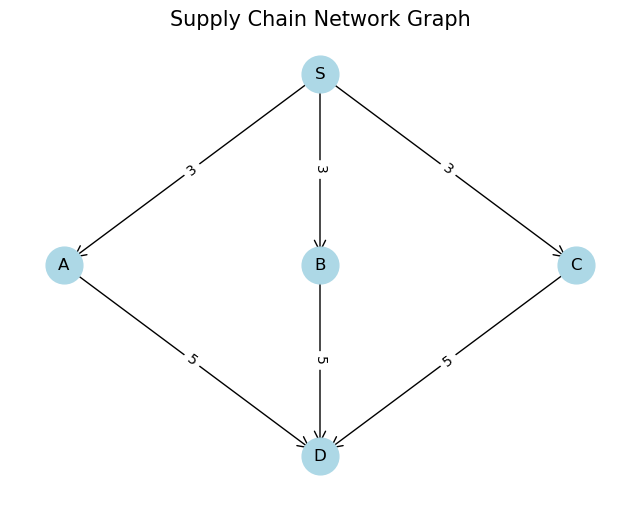

In [3]:
env = SS_Mngmt_Env(network_config=network_config,
                   EP_LENGTH=EP_LENGTH,
                   render_mode="human",
                   model_type="greedy")

check_env(env, warn=True)

env.render_network()

In [4]:
greedy_algorithm(env,
                 num_episodes=1,
                 episode_length=EP_LENGTH)

Episode Length: 2
Stock Level: [[30. 20. 32.]]
Planned Demand: [0. 0. 0.]
Actual Demand: [0. 0. 0.]
Action: [15, 15, 50]
Order: [0 0 0]
Reward: 139.4

Backlog:
{'A': deque([]), 'B': deque([]), 'C': deque([])}
Order Queue:
{   'A': deque([0, 50, 15], maxlen=3),
    'B': deque([0, 50, 15], maxlen=3),
    'C': deque([0, 50, 50], maxlen=3)}

Episode Length: 2
Stock Level: [[25. 21. 25.]]
Planned Demand: [0. 5. 5.]
Actual Demand: [0. 7. 7.]
Action: [0, 50, 15]
Order: [0 0 0]
Reward: 79.25

Backlog:
{'A': deque([]), 'B': deque([]), 'C': deque([])}
Order Queue:
{   'A': deque([0, 50, 0], maxlen=3),
    'B': deque([0, 50, 50], maxlen=3),
    'C': deque([0, 50, 15], maxlen=3)}

Episode Length: 2
Stock Level: [[25.  6. 16.]]
Planned Demand: [ 8.  7. 10.]
Actual Demand: [5. 9. 6.]
Action: [50, 15, 15]
Order: [0 0 0]
Reward: 440.15

Backlog:
{'A': deque([]), 'B': deque([]), 'C': deque([])}
Order Queue:
{   'A': deque([0, 50, 50], maxlen=3),
    'B': deque([0, 50, 15], maxlen=3),
    'C': deque([0,

[13989.099999999999]

In [5]:
df = pd.read_csv('./Data/2024-11-04_last_environment_data_greedy.csv')
plot_data(df)

FileNotFoundError: [Errno 2] No such file or directory: './Data/2024-11-04_last_environment_data_greedy.csv'